### 0. Implement the first neural network, a hidden layer.
requirement
* Implementing a 2-class classification neural network with a single hidden layer
* Use units with non-linear activation capabilities, such as tanh
* Calculate cross entropy loss
* Implement forward and backward propagation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from load_dataset import load_planar_dataset

### 1. load dataset

In [17]:
X, Y = load_planar_dataset()
print ('dataset feature\'s shape:', X.shape)
print ('dataset\'s target:', Y.shape)
print ('number of samples:', X.shape[1])

dataset feature's shape: (2, 400)
dataset's target: (1, 400)
number of samples: 400


### 2. reshape data

In [18]:
X = X.T
Y = Y.T
print ('dataset feature\'s shape:', X.shape)
print ('dataset\'s target:', Y.shape)
print ('number of samples:', X.shape[0])

dataset feature's shape: (400, 2)
dataset's target: (400, 1)
number of samples: 400


### 3. show dataset

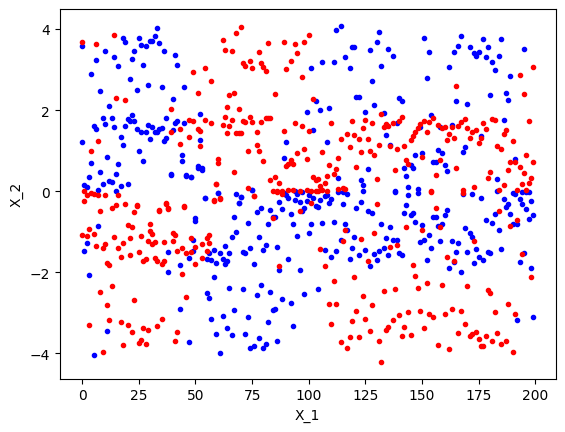

In [19]:
plt.plot(X[Y.T.flatten() == 0], 'b.')
plt.plot(X[Y.T.flatten() == 1], 'r.')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

### 3. define sigmoid function

In [20]:
def sigmoid(x):
    """
    """
    s = 1/(1+np.exp(-x))
    return s

### 4. Define neural network structure
Network input/output and number of hidden layer neurons

In [27]:
def layer_size(X, Y):
    # input layer size
    n_x = X.shape[1]
    # hidden layer size
    n_h = 4
    # output layer size
    n_y = Y.shape[1]

    return (n_x, n_h, n_y)

# test layer_size function
n_x, n_h, n_y = layer_size(X, Y)
print(n_x, n_h, n_y)

2 4 1


### 5. Initialize model parameters
Randomly initialize weights and bias to 0

In [29]:
def init_params(n_x, n_h, n_y):
    np.random.seed(2)

    # parameters for creating hidden layers
    # make the value smaller
    W1 = np.random.randn(n_x, n_h) * 0.01
    b1 = np.zeros((n_h, 1))

    # parameters before creating the output layer
    W2 = np.random.randn(n_h, n_y) * 0.01
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_x, n_h))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_h, n_y))
    assert(b2.shape == (n_y, 1))

    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return params

# test init_params function
params = init_params(n_x, n_h, n_y)
print(params)

{'W1': array([[-0.00416758, -0.00056267, -0.02136196,  0.01640271],
       [-0.01793436, -0.00841747,  0.00502881, -0.01245288]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[-0.01057952],
       [-0.00909008],
       [ 0.00551454],
       [ 0.02292208]]), 'b2': array([[0.]])}


### 6. forward
$$Z^{[1]} = W^{[1]}X+b^{[1]}$$

$${A}^{[1]}=tanh(Z^{[1]})$$             

$$Z^{[2]} = W^{[2]}A^{[1]}+b^{[2]}$$

$$A^{[2]}=\sigma(Z^{[2]})$$    
use function: np.dot,np.tanh, sigmoid

In [34]:
def forward(X, params):
    """
    Argument:
    X:(m, n_feature)
    
    Returns:
    A2: last layer's output
    cache: A dictionary for storing intermediate calculation results in backpropagation computation
    """
    # 1. get params
    # W1: (n_feature, n_h), and n_x == n_feature
    W1 = params["W1"]
    # b1: (n_h, 1)
    b1 = params["b1"]
    # W2: (n_h, n_y)
    W2 = params["W2"]
    # b2: (n_y, 1)
    b2 = params["b2"]

    # 2. first layer 
    # X:(m, n_feature), W1: (n_feature, n_h), Z1: (m, n_h)
    Z1 = (np.matmul(X, W1).T + b1).T
    # A1: (m, n_h)
    A1 = np.tanh(Z1)

    # 3. second layer
    # A1: (m, n_h), W2: (n_h, n_y), Z2: (m, n_y)
    Z2 = (np.matmul(A1, W2).T + b2).T
    # A2: (m, n_y)
    A2 = sigmoid(Z2)

    assert(A2.shape == (X.shape[0], 1))

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2,
    }

    return A2, cache

# test forward function
A2, cache = forward(X, params)
print(A2.shape)


(400, 1)


### 7. compute cost
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

In [36]:
def compute_cost(A2, Y, params):
    """
    params: 
        A2: last layer output, shape: (m, n_y)
        Y: label, shape: (m, n_y)
        params: comtain W1: (n_feature, n_h), b1: (n_feature, 1), W2: (n_h, n_y), b2: 
    return: cost
    """
    m = Y.shape[0]
    logpro = np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1- A2))
    cost = (-1 / m) * np.sum(logpro)

    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

# test compute_cost function
cost = compute_cost(A2, Y, params)
print(cost)

0.6931418770706425


### 8. backward
first compute:
$$dZ^{[2]} = A^{[2]} - Y$$

$$dW^{[2]}=\frac{1}{m}dZ^{[2]}{A^{[1]}}^{T}$$

$$db^{[2]}=\frac{1}{m}np.sum(dZ^{[2]}, axis=1)$$

compute hidden layer:
$$dZ^{[1]} = {W^{[2]}}^{T}dZ^{[2]}*{(1-g(Z^{[1]})}^{2}={W^{[2]}}^{T}dZ^{[2]}*{(1-A^{[1]})}^{2}$$

$$dW^{[1]}=\frac{1}{m}dZ^{[1]}X^{T}$$

$$db^{[1]} = \frac{1}{m}np.sum(dZ^{[1]}, axis=1)$$


In [53]:
def backward(params, cache, X, Y):
    """
    parameters：
    cache：Store the forward propagation calculation results for each layer
    X：(m, n_feature)
    Y：(m, n_y)
    
    return: Gradient of each parameter
    """
    m = X.shape[0]

    # 1. get params
    # W1: (n_feature, n_h), and n_x == n_feature
    W1 = params["W1"]
    # W2: (n_h, n_y)
    W2 = params["W2"]
    # A1: (m, n_h)
    A1 = cache["A1"]
    # A2: (m, n_y)
    A2 = cache["A2"]

    n_h = W1.shape[1]
    n_y = Y.shape[1]
    
    # 2. compute last layer backward grads
    # dZ2: (m, n_y)
    dZ2 = A2 - Y
    # dW2: (n_h, n_y)
    dW2 = 1/m * np.dot(A1.T, dZ2)
    # db2: (n_y, 1)
    db2 = 1/m * np.sum(dZ2, axis=0).reshape(n_y, 1)
    
    # 3. compute hidden layer backward grads
    # dZ1: (m, n_h)
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(A1, 2))
    # dW1: (n_feature, n_h) and n_x == n_feature
    dW1 = (1/m)*np.dot(X.T, dZ1)
    # db1: (n_h, 1)
    db1 = 1/m * np.sum(dZ1, axis=0).reshape(n_h, 1)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

# test compute backward function
grads = backward(params, cache, X, Y)
dW1 = grads["dW1"]
db1 = grads["db1"]
dW2 = grads["dW2"]
db2 = grads["db2"]
print(dW1.shape)
print(db1.shape)
print(dW2.shape)  
print(db2.shape) 

(2, 4)
(4, 1)
(4, 1)
(1, 1)


### 9. update grad

In [54]:
def update_params(params, grads, learning_rate=0.005):
    """
    parameters：
    params：Store the weight params, include: W1: (n_feature, n_h), b1: (n_h, 1), W2: (n_h, n_y) b2:(n_y, 1)
    grads: store grads, include dW1, db1, dW2, db2
    learning_rate: 
    return: params
    """

    # 1. get weights
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # 2. get grads
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    # update weights
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return params

# test update_params function
params = update_params(params, grads)
print(params)

{'W1': array([[-0.00416875, -0.00056368, -0.02136134,  0.01640531],
       [-0.017924  , -0.00840853,  0.00502337, -0.01247543]]), 'b1': array([[ 2.29053666e-10],
       [ 2.33901890e-11],
       [-1.42456444e-09],
       [-7.53424580e-09]]), 'W2': array([[-0.01056236],
       [-0.00908185],
       [ 0.0055072 ],
       [ 0.02293618]]), 'b2': array([[1.5920735e-08]])}


### 10. create netword to train

In [56]:
def nn_model(X, Y, num_iterations = 10000, print_cost=False):

    np.random.seed(3)

    # 1. get params
    n_x, n_h, n_y = layer_size(X, Y)
    params = init_params(n_x, n_h, n_y)
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    # 2. train
    for i in range(0, num_iterations):
        # 3. forward
        A2, cache = forward(X, params)

        # 4. compute cost
        cost = compute_cost(A2, Y, params)

        # 5. backward
        grads = backward(params, cache, X, Y)

        # 6. update params
        params = update_params(params, grads)

        if i % 1000 == 0:
            print("iteration %i: %f" %(i, cost))

    return params

# test nn_model function
params = nn_model(X, Y, num_iterations=1000)

iteration 0: 0.693142


### 11. predict

In [58]:
def predict(params, X):
    A2, cache = forward(X, params)
    Y_prediction = np.where(A2 > 0.5, 1, 0)

    return Y_prediction

# test predict function
Y_prediction = predict(params, X)
print("train data accuracy: {}".format(np.mean(Y_prediction == Y)))

train data accuracy: 0.5725


In [60]:
# test
params = nn_model(X, Y, num_iterations=20000)
Y_prediction = predict(params, X)
print("train data accuracy: {}".format(np.mean(Y_prediction == Y)))

iteration 0: 0.693142
iteration 1000: 0.692663
iteration 2000: 0.690479
iteration 3000: 0.685656
iteration 4000: 0.679919
iteration 5000: 0.672278
iteration 6000: 0.663349
iteration 7000: 0.651331
iteration 8000: 0.638416
iteration 9000: 0.628278
iteration 10000: 0.621286
iteration 11000: 0.616461
iteration 12000: 0.612386
iteration 13000: 0.606236
iteration 14000: 0.591075
iteration 15000: 0.560191
iteration 16000: 0.521176
iteration 17000: 0.485815
iteration 18000: 0.457402
iteration 19000: 0.435228
train data accuracy: 0.8525
